In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

%matplotlib inline

In [110]:
# loading the data
latencies = pd.read_csv("results.csv").set_index("i")
latencies

,src,type,latency
i,,,
1,b_tree,insert,10471
1,ordered_map,insert,4847
2,b_tree,insert,2997
2,ordered_map,insert,1628
3,b_tree,insert,3145
...,...,...,...
1048575,ordered_map,search,1443
1048576,b_tree,search,6327
1048576,ordered_map,search,1480


In [111]:
inserts = latencies[latencies["type"] == "insert"]
sl_insert = inserts[inserts["src"] == "b_tree"]
om_insert = inserts[inserts["src"] == "ordered_map"]

In [112]:
gets = latencies[latencies["type"] == "search"]
sl_get = gets[gets["src"] == "b_tree"]
om_get = gets[gets["src"] == "ordered_map"]

In [113]:
removes = latencies[latencies["type"] == "remove"]
sl_remove = removes[removes["src"] == "b_tree"]
om_remove = removes[removes["src"] == "ordered_map"]

In [114]:
@dataclass
class PlotResult:
    fig: plt.Figure

def plot_latencies(sl_data: pd.DataFrame, om_data: pd.DataFrame, type):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    om_data.plot(label="latencies (cycles)", ax=ax1)
    ax1.set_title("Built-in Ordered Map")
    ax1.axhline(om_data["latency"].mean(), color="orange", label=f"avg ({np.around(om_data['latency'].mean(), 2)})")
    ax1.legend()
    
    sl_data.plot(label="latencies (cycles)", ax=ax2)
    ax2.set_title("B-tree")
    ax2.axhline(sl_data['latency'].mean(), color="orange", label=f"avg ({np.around(sl_data['latency'].mean(), 2)})")
    ax2.legend()
    
    fig.savefig(f"../report/graphics/05-{type}-latencies.png", bbox_inches='tight')
    return PlotResult(fig)

# Insertion Latency

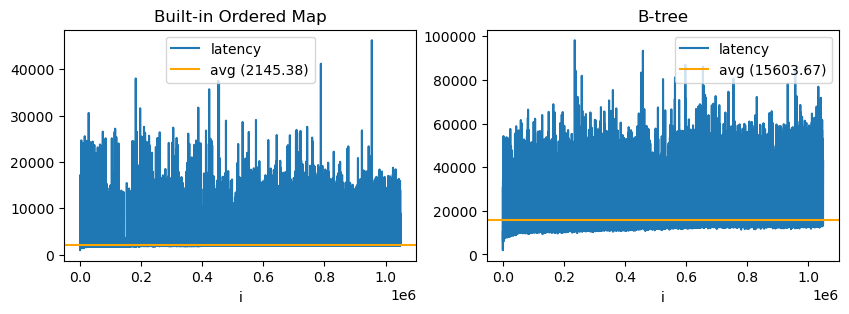

In [115]:
res = plot_latencies(sl_insert, om_insert, "insert")
plt.show(res.fig)

# Search Latency

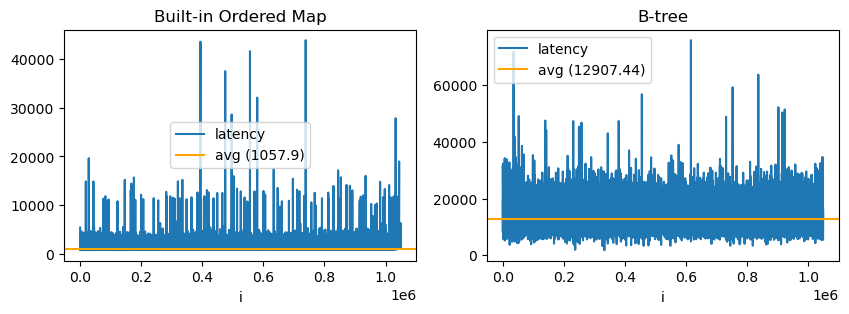

In [116]:
res = plot_latencies(sl_get, om_get, "search")
plt.show(res.fig)

# Deletion Latency

In [117]:
# res = plot_latencies(sl_remove, om_remove, "delete")
# plt.show(res.fig)